Lima baris pertama dari dataset:
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perime

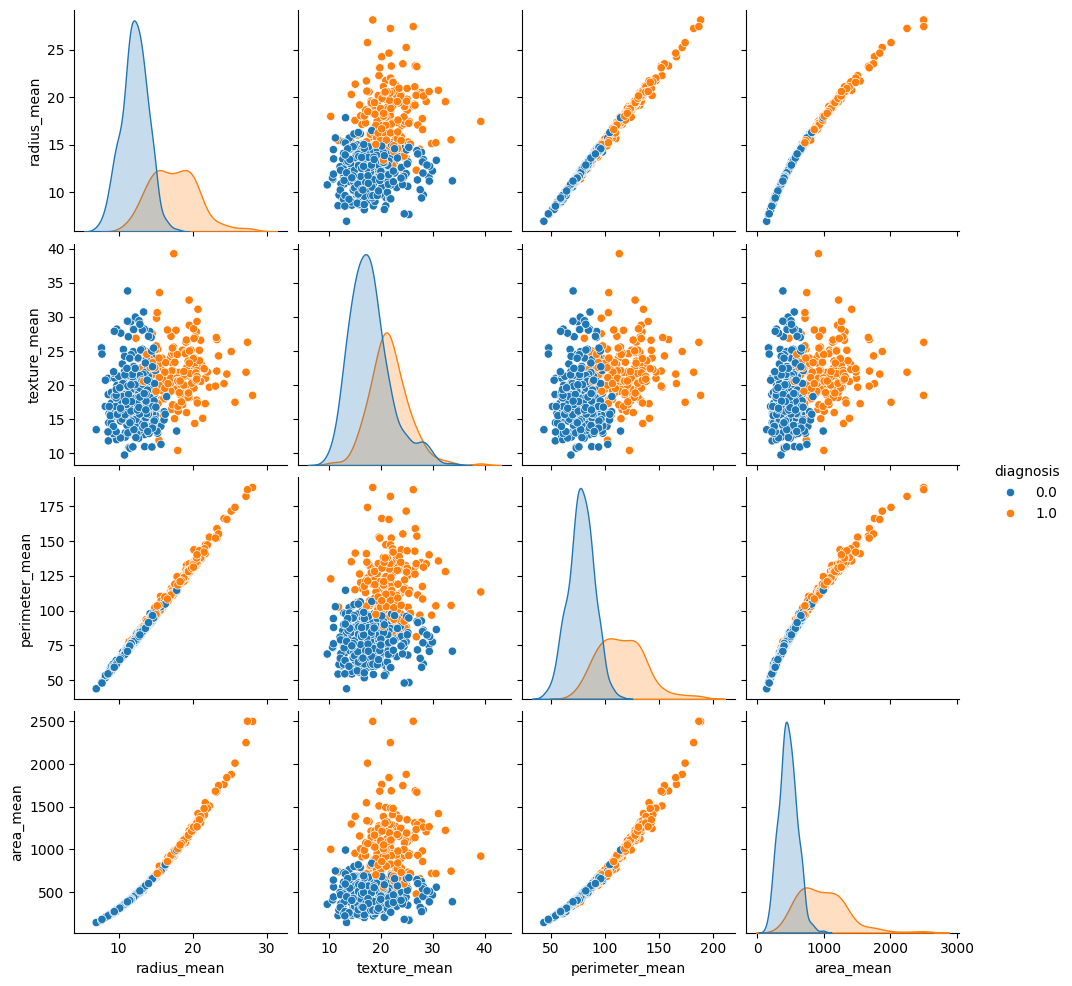


Logistic Regression
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99       108
         1.0       0.97      0.98      0.98        63

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171

[[106   2]
 [  1  62]]

Random Forest
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98       108
         1.0       0.98      0.94      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171

[[107   1]
 [  4  59]]

K-Nearest Neighbors
              precision    recall  f1-score   support

         0.0       0.96      0.97      0.97       108
         1.0       0.95      0.94      0.94        63

    accuracy                           0.96       171
   macro avg       0.96  

In [2]:
# 1. Import pustaka yang diperlukan
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer

# 2. Memuat dataset
file_path = '/content/Cancer_Data.csv'  # Ganti dengan path sesuai jika perlu
data = pd.read_csv(file_path)

# 3. Eksplorasi Data
print("Lima baris pertama dari dataset:")
print(data.head())

print("\nInformasi dataset:")
print(data.info())

print("\nStatistik deskriptif:")
print(data.describe())

# 4. Preprocessing: Menangani data yang tidak diperlukan
# Menghapus kolom 'id' karena tidak relevan dalam analisis
if 'id' in data.columns:
    data = data.drop(columns='id')

# Menghapus kolom 'Unnamed: 32' jika ada
if 'Unnamed: 32' in data.columns:
    data = data.drop(columns='Unnamed: 32')

# Mengubah label diagnosis menjadi numerik (0 untuk 'B', 1 untuk 'M')
le = LabelEncoder()
data['diagnosis'] = le.fit_transform(data['diagnosis'])

# 5. Menangani nilai NaN dengan SimpleImputer
imputer = SimpleImputer(strategy='mean')  # Mengisi nilai NaN dengan rata-rata
data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# 6. Visualisasi beberapa fitur
sns.pairplot(data[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'diagnosis']], hue='diagnosis')
plt.show()

# 7. Pembagian Data
X = data.drop(columns='diagnosis')
y = data['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 8. Standarisasi fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 9. Pembangunan dan Evaluasi Model

# Logistic Regression
print("\nLogistic Regression")
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
print(classification_report(y_test, y_pred_logreg))
print(confusion_matrix(y_test, y_pred_logreg))

# Random Forest
print("\nRandom Forest")
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))

# K-Nearest Neighbors
print("\nK-Nearest Neighbors")
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print(classification_report(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))

# 10. Interpretasi Hasil
print("\nModel Evaluasi Selesai")
